https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

# Get the Data

#### Instancias varias?

In [43]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Download the Data

In [44]:
# Al invocar la funcion fetch_housing_data() se crea el directorio datasets/housing 
# se descarga y descomprime el archivo housing.tgz localmente como housing.csv

# Inhabilito este codigo ya que lo ejecute por primera vez y ya se descargo el archivo en la maquina,
# adicionalmente al ejecutar el codigo sin contar con internet me genera error por timeout.

import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("Panda", pd.__version__)
print("Numpy", np.__version__)
#print(matplotlib.__version__)
print("Seaborn", sns.__version__)
print("Scikit-Learn", sklearn.__version__)

'''
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
'''

# Obtener la data de internet - Tal lo indicado en el libro
"""
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Invocar la funcion para descargar y descomprimir la data localmente
fetch_housing_data()

# Construyo Funcion para abrir el dataset ubicado en una carpeta diferente a donde esta el .py
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Invoco la funcion para abrir el dataset
housing = load_housing_data()
"""

# Abro el dataset cuando está ubicado en la misma carpeta del .py
housing = pd.read_csv("housing.csv")


Panda 0.25.1
Numpy 1.17.0
Seaborn 0.9.0
Scikit-Learn 0.21.3


## Take a quick look at the Data Structure

In [45]:
housing.head() # Top five rows in the dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
housing.info() # Description of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [47]:
# Categories related to column ocean_proximity - its maybe a Categorical attribute
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [48]:
# Summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### plt.subplots()
--------

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

fig, ax = plt.subplots()

is more concise than this:

fig = plt.figure()

ax = fig.add_subplot(111)

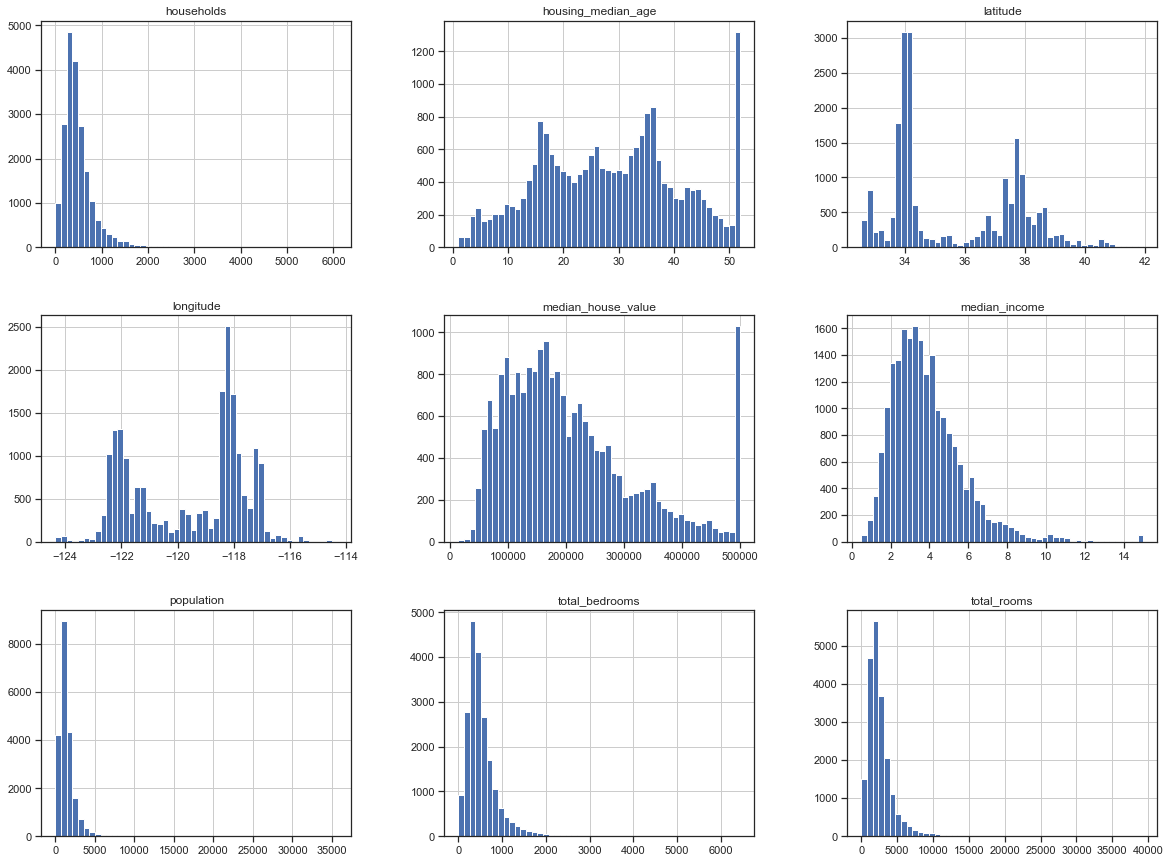

In [49]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
#plt.xlabel()
#plt.ylabel('')
plt.show()

## Create a Test Set

In [50]:
# Creating a Test Set
# Creando el Test Set: 
# Separando 20% de la data para Test - con random y split_train_test()
# La desventaja de utilizar este random es que cada vez que ejecute el modelo
# me arroja diferentes Set Test y por lo tanto el Train Set tambien es diferente
# esto conlleva a que de alguna manera se usa toda o buena parte de la data en
# el entrenamiento del modelo, lo cual no es bueno.

#import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    print("test_set_size: ", test_set_size)        
    test_indices = shuffled_indices[:test_set_size]
    print("test indices: ", test_indices)    
    train_indices = shuffled_indices[test_set_size:]
    print("train indices: ", train_indices)    
    return data.iloc[train_indices], data.iloc[test_indices]

# iloc: seleccion con indices numericos, por posicion
# loc: seleccion con labels, etiqueta

train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set), "train data +", len(test_set), "test data")

# Esta no es la forma correcta de determinar train y test sets
# ya que al actualizar el dataset se estaria mezclando data
# de train y de test, es decir, no se respetaria su clasificacion
# inicial


test_set_size:  4128
test indices:  [11693 14966 17164 ... 19754 18954  2870]
train indices:  [  978 19257  7012 ... 19718 15738  5618]
16512 train data + 4128 test data


In [51]:
# Crear un Test Set utilizando Hash en un identificador unico de cada instancia del dataset
# Para el caso del dataset housing no se tiene una columna con identificador unico para cada instancia 
# Por lo que puede usarse el row index como el identificador - ID
# Otra opcion seria utilizar el feature mas estable como identificador unico (ej. las coordenadas)
# esto en caso de no poder garantizar que no se eliminen registros del dataset original o de 
# poder incluir nueva data al dataset al final de este 

'''
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # Adiciona una columna 'index'
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# Utilizando la nueva columna index, no puedo eliminar registros del dataset original, y
# las nuevas adiciones al dataset deben realizarse al final del dataset original.  
'''


'\nimport hashlib\n\ndef test_set_check(identifier, test_ratio, hash):\n    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio\n\ndef split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):\n    ids = data[id_column]\n    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))\n    return data.loc[~in_test_set], data.loc[in_test_set]\n\nhousing_with_id = housing.reset_index() # Adiciona una columna \'index\'\ntrain_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")\n\n# Utilizando la nueva columna index, no puedo eliminar registros del dataset original, y\n# las nuevas adiciones al dataset deben realizarse al final del dataset original.  \n'

In [52]:
# Seleccion Random
# Como la data siempre va a ser la misma (no cambia ni se incrementa o disminuye) usamos la funcion
# train_test_split para usar seed o random state garantizando que siempre genere los mismos indices

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")




16512 Train Set data + 4128 Test Set data


In [53]:
# Dado que el atributo "median income" es importante para predecir el "median housing prices"
# y para evitar sesgos en la informacion, para garantizar que el "test set" sea representativo
# de las varias categorias de ingresos en el dataset, creamos un atributo categorico para el 
# median_income, dado que este es un valor continuo.
# divido el "median_income" por 1.5 y redondeadas para limitar el numero de categorias del median income
# de manera discreta. Las categorias cuyo valor sea mayor a 5, las clasifico en la categoria 5


housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)



"""
Where Parameters
----------
cond : boolean NDFrame, array-like, or callable
    Where `cond` is True, keep the original value. Where
    False, replace with corresponding value from `other`.
    If `cond` is callable, it is computed on the NDFrame and
    should return boolean NDFrame or array. The callable must
    not change input NDFrame (though pandas doesn't check it).

    .. versionadded:: 0.18.1
        A callable can be used as cond.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")
other : scalar, NDFrame, or callable
    Entries where `cond` is False are replaced with
    corresponding value from `other`.\n\n
    If other is callable, it is computed on the NDFrame and
    should return scalar or NDFrame. The callable must not
    change input NDFrame (though pandas doesn't check it).

    .. versionadded:: 0.18.1
        A callable can be used as other.

inplace : boolean, default False
    Whether to perform the operation in place on the data
axis : alignment axis if needed, default None
level : alignment level if needed, default None
errors : str, {'raise', 'ignore'}, default 'raise'
    - ``raise`` : allow exceptions to be raised
    - ``ignore`` : suppress exceptions. On error return original object

    Note that currently this parameter won't affect
    the results and will always coerce to a suitable dtype.

try_cast : boolean, default False
    try to cast the result back to the input type (if possible),
raise_on_error : boolean, default True
    Whether to raise on invalid data types (e.g. trying to where on
    strings)

    .. deprecated:: 0.21.0from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")
    
    
    
    
When inplace=True is passed, the data is renamed in place (it returns nothing), so you'd use:
df.an_operation(inplace=True)

When inplace=False is passed (this is the default value, so isn't necessary), 
performs the operation and returns a copy of the object
"""

'\nWhere Parameters\n----------\ncond : boolean NDFrame, array-like, or callable\n    Where `cond` is True, keep the original value. Where\n    False, replace with corresponding value from `other`.\n    If `cond` is callable, it is computed on the NDFrame and\n    should return boolean NDFrame or array. The callable must\n    not change input NDFrame (though pandas doesn\'t check it).\n\n    .. versionadded:: 0.18.1\n        A callable can be used as cond.\nfrom sklearn.model_selection import train_test_split\n\ntrain_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)\n\nprint(len(train_set), "Train Set data +", len(test_set), "Test Set data")\nother : scalar, NDFrame, or callable\n    Entries where `cond` is False are replaced with\n    corresponding value from `other`.\n\n\n    If other is callable, it is computed on the NDFrame and\n    should return scalar or NDFrame. The callable must not\n    change input NDFrame (though pandas doesn\'t check it).\n\n  

In [54]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [55]:
# Seleccion con Stratified Sampling de acuerdo con la nueva categoria "income_cat"

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print ("Categorias Unicas de income_cat en el train set: ", strat_train_set.income_cat.unique())
    
print ("Tamaño strat_train_set", len(strat_train_set))

#plt.figure(figsize = (10,8))
#sns.boxplot(x = strat_train_set.median_income, y = strat_train_set.median_house_value)

print ("Tamaño strat_test_set", len(strat_test_set))
#print (strat_train_set)

#Proporcion de la categoria "income_cat" en el test_set
print("Proporcion con Sampling de la categoria income_cat en el test_set:\n\n", 
      (strat_test_set["income_cat"].value_counts() / len(strat_test_set) * 100))


Categorias Unicas de income_cat en el train set:  [2. 5. 3. 4. 1.]
Tamaño strat_train_set 16512
Tamaño strat_test_set 4128
Proporcion con Sampling de la categoria income_cat en el test_set:

 3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_cat, dtype: float64


In [56]:
# Estos parametros son muy amplios y no se logra su graficacion
#plt.figure(figsize = (10,8))
#sns.boxplot(x = strat_train_set.median_income, y = strat_train_set.median_house_value)


In [57]:
# De acuerdo con Seleccion Random

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")


#Proporcion de la categoria "income_cat" en el test_set con seleccion de datos aleatoria
print("Proporcion RANDOM de la categoria income_cat en el test_set:\n\n", (test_set["income_cat"].value_counts() / len(strat_test_set) * 100))



16512 Train Set data + 4128 Test Set data
Proporcion RANDOM de la categoria income_cat en el test_set:

 3.0    35.852713
2.0    32.437016
4.0    16.739341
5.0    10.949612
1.0     4.021318
Name: income_cat, dtype: float64


In [58]:
#Proporcion de la categoria "income_cat" en el dataset completo

print ("Proporcion la categoria income_cat en el dataset completo:\n\n", 
       (housing["income_cat"].value_counts() / len(housing)*100))


Proporcion la categoria income_cat en el dataset completo:

 3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cat, dtype: float64


In [59]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [60]:
# Funcion para comparar las proporciones del atributo "income_cat" en cada test de acuerdo 
# con el overall

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [61]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [62]:
# Top five rows in the strat_train_set - Stratified

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


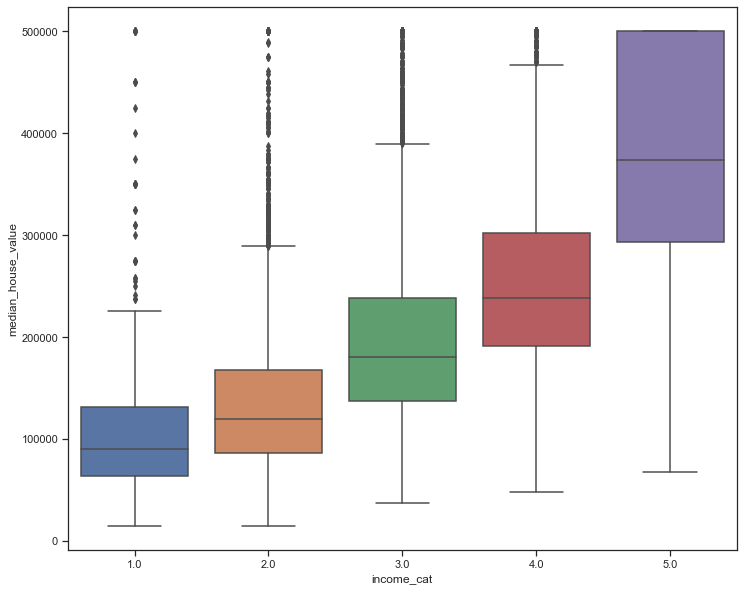

In [63]:
plt.figure(figsize = (12,10))
sns.boxplot(x = strat_train_set.income_cat, y = strat_train_set.median_house_value)

In [64]:
# help(funcion)

### seaborn.pairplot

seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.

In [65]:
#cols = ['median_house_value', 'income_cat', 'housing_median_age']
#sns.set(style = 'ticks', color_codes = 'True')
#sns.pairplot(strat_train_set[cols], size = 3, kind = 'reg')

c:\users\darangov\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


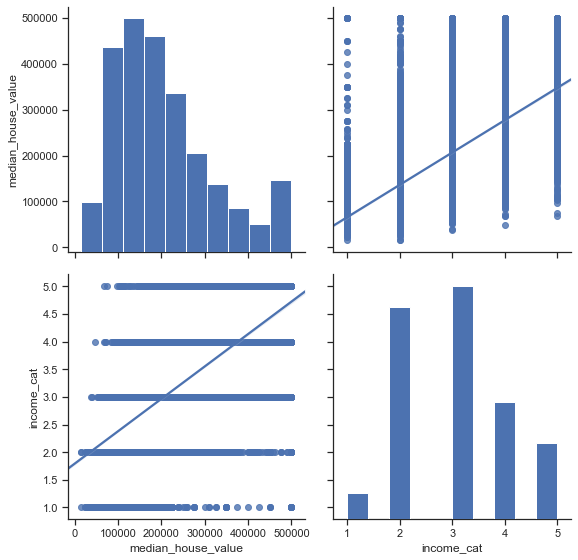

In [66]:
cols = ['median_house_value', 'income_cat']
sns.set(style = 'ticks', color_codes = 'True')
sns.pairplot(strat_train_set[cols], size = 4, kind = 'reg')

In [67]:
# Removemos el atributo income_cat de strat_train_set y de strat_test_set para dejar el dataset
# en su estado original

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True) # drop values from column income_cat
    
# axis = 1: Recorre verticalmente por columnas (izquierda a derecha) ???
# axis = 0: Recorre horizontalmente por filas (arriba hacia abajo) ???
       

In [68]:
# Top five rows in the strat_train_set - Stratified
# debe aparecer sin el campo income_cat
# strat_train_set.head()

In [69]:
# Creo copia del training set para no dañar el original.Lo llamo housing
housing = strat_train_set.copy()

In [70]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


# Discover and visualize the Data to gain insights (obtener ideas)

Saving figure housing_prices_scatterplot


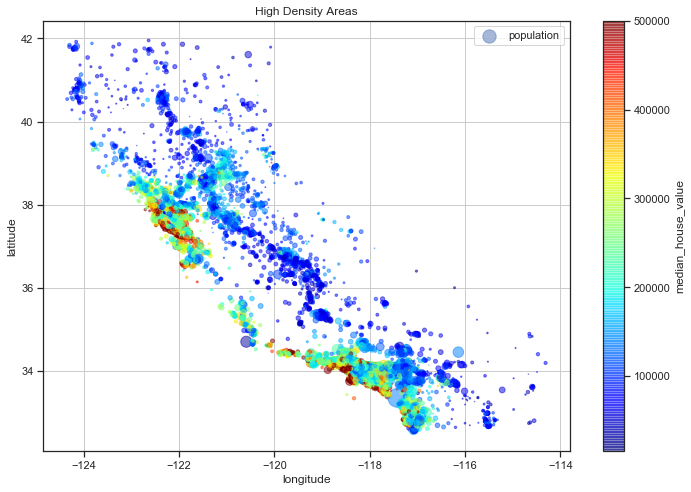

In [71]:
# Dado que tenemos informacion geografica (latitud y longitud) creamos un scatterplot
# de la copia de strat_train_set y que llamé housing

#housing.plot(kind = "scatter", x = "longitude", y = "latitude")
#"""housing.plot(kind = "scatter", x = "longitude", y = "latitude", title = "High density areas", grid = True, 
#             alpha = "0.1") """

housing.plot(kind = "scatter", x = "longitude", y = "latitude", title = "High Density Areas", grid = True, 
             alpha = 0.5, s = housing["population"]/100, label = "population", figsize = (10,7), 
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, sharex = False)
plt.legend()

save_fig("housing_prices_scatterplot")

# El radio de cada circulo representa la poblacion de cada distrito (opcion s)
# El color representa el precio (opcion c)
# color map predefinido (opcion cmap) llamado jet, que va de azul a rojo

Saving figure california_housing_prices_plot


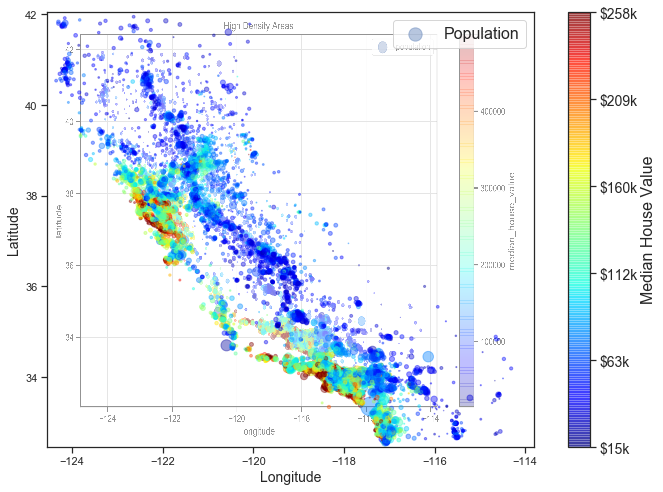

In [75]:
import matplotlib.image as mpimg
# Uso otra imagen ya que no tengo la fuente california.png
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlations

In [76]:
# Determino correlaciones
# Con el coeficiente de correlacion estandar (Pearsons r) entre cada par de atributos
# respecto al atributo median_house_value

corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending = False)



median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [77]:
train_corr = strat_train_set.select_dtypes(include = [np.number])

train_corr.shape


(16512, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120F0BF0>,
      dtype=object)

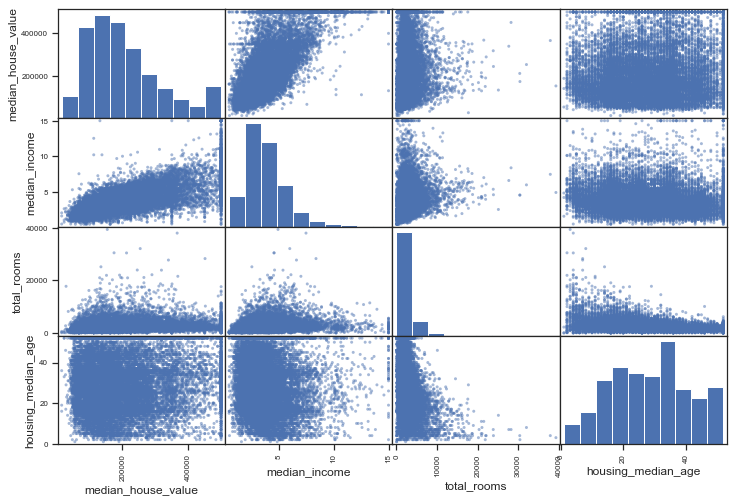

In [78]:
# Correlacion grafica entre algunos atributos con scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix (housing[attributes], figsize = (12,8))


Text(5, 12.3, 'Correlations Heat Map')

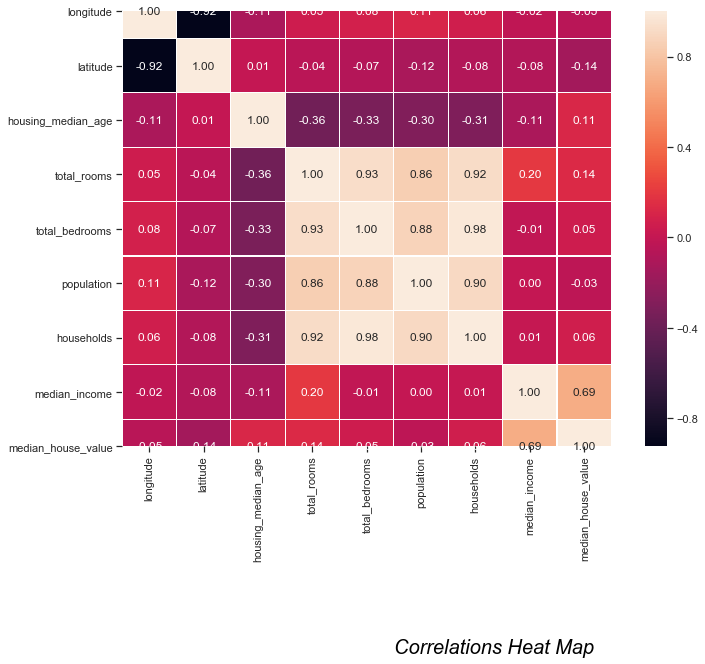

In [79]:
# Correlacion matricial entre todos los atributos
correlation = train_corr.corr()
f , ax = plt.subplots(figsize = (12,8))
#sns.heatmap(correlation, annot = True, linewidth = 0.5, ax = ax, square = True, cbar = True, robust = True)
sns.heatmap(correlation, annot = True, linewidth = 0.1, ax = ax, square = True, fmt = ".2f", annot_kws={'size':12})
# fmt = ".2f" - float 2 decimales
plt.text(5,12.3, "Correlations Heat Map", fontsize = 20, color='Black', fontstyle='italic')
#plt.show()

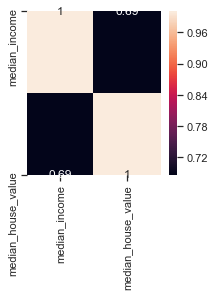

In [80]:
# Correlacion respecto al atributo principal y cuya correlacion sea superior a 0.5

top_feature = correlation.index[abs(correlation['median_house_value'] > 0.5)]
plt.subplots(figsize = (3,3))
top_corr = train_corr[top_feature].corr()
sns.heatmap(top_corr, annot = True)
plt.show()



In [81]:
# cols = ['median_house_value', 'income_cat', 'total_rooms']
#sns.set(style = 'ticks')
#sns.pairplot(strat_train_set[cols], size = 4, kind = 'reg')


## Experimenting Attribute Combinations (build new attributes)

In [85]:
housing["rooms_per_households"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [86]:
# Correlacion con nuevos atributos respecto a "median_house_value"

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

# You can see that the new item, bedrooms_per_room has a good correlation too


median_house_value          1.000000
median_income               0.687160
rooms_per_households        0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


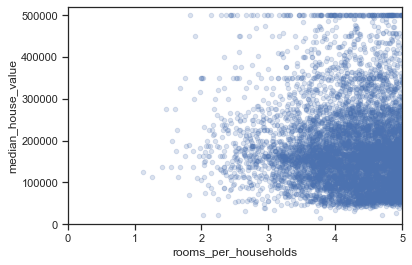

In [88]:
housing.plot(kind="scatter", x="rooms_per_households", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Prepare the data for ML Algorithms

In [89]:
# Creo copia del training set pero obviando 'predictors' y 'labels' (valores). 
# ya que no deseo aplicar transformaciones a estos atributos.
# Lo llamo housing
# drop() crea una copia, un nuevo objeto de la data sin afectar el strat_train_set y
# obviando el/los campos indicados.

housing = strat_train_set.drop("median_house_value", axis = 1)

# axis = 1 para remover columna; en este caso "median_housde_value"

In [90]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [91]:
#strat_train_set.head()

In [92]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [93]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.7+ MB


In [94]:
# Muestreo de celdas incorrectas
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [ ]:
# En nueva variable 'almaceno' los valores de los labels (valores) del atributo (que es dado pero que 
# finalmente es el que deseo predecir)

housing_labels = strat_train_set["median_house_value"].copy()
housing_labels

## Data Cleaning
-------------------------------

Attribute with missing values: total_bedrooms

puedo ejecutar cualquiera de estas opciones:
dropna(): drops any row containing missing values
drop(): creates new object without an indicated column(s)
set missing values to: zero, the mean, the median, etc)   

In [ ]:
# Attribute with missing values: total_bedrooms

# Imputer class to manage missing values

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")

# since the median can only be computed on numerical attributes, we need to create a copy
# of the data without the text attribute ocean_proximity

housing_num = housing.drop("ocean_proximity", axis = 1)

housing_num.head()

In [ ]:
# Aplico clase Imputer definida
# Esta calcula la mediana de cada atributo numerico y lo almacena en su
# variable de instancia statistics_
# se debe aplicar a toda la data ya que en un futuro, con el sistema en producccion
# la nueva data podria traer otros campos con data vacia

imputer.fit(housing_num)
mediana_train = imputer.statistics_
mediana_train
#imputer.statistics_

In [ ]:
housing_num.median()

In [ ]:
housing_num.median().values

In [ ]:
# Reemplazo valores faltantes con la mediana calculada con Imputer

X = imputer.transform(housing_num)

# Plain Numpy array containing the transformed features 
X

In [ ]:
# create a Pandas Dataframe with transformed features
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.info()

# ver que ya estan todos los datos llenos

# Handling Text and Categorical Attributes

In [ ]:
# Convert categories from text to numbers

housing_cat = housing["ocean_proximity"]
housing_cat.head()

In [ ]:
# Metodo por si solo no recomendable ya que algoritmo asume que valores cercanos son mas afines que los lejanos
# pero si se requiere para luego convertir estos "enteros categoricos" a One Hot Encoding
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

In [ ]:
housing_categories

In [ ]:
# Convert integer categorical values to one-hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

In [ ]:
# Convierto la sparse matrix (1 sola dimension) a un Numpy array
housing_cat_1hot.toarray()

In [ ]:
# Metodo para realizar los dos pasos anteriores en uno solo
# (Text categories a Integer categories y luego
# Integer categories a OneHot vectors)

#from sklearn.preprocessing import CategoricalEncoder # Encode categorical features as a numeric array.
#cat_encoder = CategoricalEncoder()
#housing_cat_reshaped = housing_cat.values.reshape(-1,1)
#housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

#class sklearn.preprocessing.CategoricalEncoder(encoding=’onehot’, categories=’auto’, dtype=<class ‘numpy.float64’>, 
#handle_unknown=’error’)[source]

#from sklearn.preprocessing import CategoricalEncoder
#enc = CategoricalEncoder(handle_unknown='ignore')
# X = [['Male', 1], ['Female', 3], ['Female', 2]]
# enc.fit(X)
... 

## - Custom Transformers
--------------



In [ ]:
# Create a transformer class that adds the combined attributres
# "rooms_per_households" , "bedrooms_per_room", "population_per_household"

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# hyperparameter: add_bedrooms_per_room (in this case)
# this hyperparameter will allow to easily find out whether adding this attribute helps the ML algorithm or not 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self # Nothing else to do
    
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
#attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
#housing_extra_attribs = attr_adder.transform(housing.values)

        



## Metodo __init__

El objetivo fundamental del método __init__ es inicializar los atributos del objeto que creamos.

Las ventajas de implementar el método __init__ en lugar del método inicializar son:

El método __init__ es el primer método que se ejecuta cuando se crea un objeto.
El método __init__ se llama automáticamente. Es decir es imposible de olvidarse de llamarlo ya que se llamará automáticamente.
Quien utiliza POO en Python (Programación Orientada a Objetos) conoce el objetivo de este método.
Otras características del método __init__ son:

Se ejecuta inmediatamente luego de crear un objeto.
El método __init__ no puede retornar dato.
el método __init__ puede recibir parámetros que se utilizan normalmente para inicializar atributos.
El método __init__ es un método opcional, de todos modos es muy común declararlo.

Veamos la sintaxis del constructor:
    
def __init__([parámetros]):
        [algoritmo]
        
##### Confeccionar una clase que represente un empleado. Definir como atributos su nombre y su sueldo. En el método __init__ cargar los atributos por teclado y luego en otro método imprimir sus datos y por último uno que imprima un mensaje si debe pagar impuestos (si el sueldo supera a 3000)        
        
class Empleado:

-- Definimos el método __init__ donde cargamos por teclado el nombre del empleado y su sueldo:

def __init__(self):
        self.nombre=input("Ingrese el nombre del empleado:")
        self.sueldo=float(input("Ingrese el sueldo:"))
        


def imprimir(self):
        print("Nombre:",self.nombre)
        print("Sueldo:",self.sueldo)

def paga_impuestos(self):
    if self.sueldo>3000:
        print("Debe pagar impuestos")
    else:
        print("No paga impuestos")


#### bloque principal


Este método (__init__) se ejecuta inmediatamente luego que se crea un objeto de la clase Empleado:

empleado1=Empleado()

empleado1.imprimir()

empleado1.paga_impuestos()

------------------

## '__init__'

#### Desarrollar una clase que represente un punto en el plano y tenga los siguientes métodos: inicializar los valores de x e y que llegan como parámetros, imprimir en que cuadrante se encuentra dicho punto (concepto matemático, primer cuadrante si x e y son positivas, si x<0 e y>0 segundo cuadrante, etc.)


class Punto:

-- En este problema el método __init__ aparte del parámetro self que siempre va tenemos otros dos parámetros:

    def __init__(self,x,y):
        self.x=x
        self.y=y

    def imprimir(self):
        print("Coordenada del punto")
        print("(",self.x,",",self.y,")")

    def imprimir_cuadrante(self):
        if self.x>0 and self.y>0:
            print("Primer cuadrange")
        else:
            if self.x<0 and self.y>0:
                print("Segundo cuadrante")
            else:
                if self.x<0 and self.y<0:
                    print("Tercer cuadrante")
                else:
                    if self.x>0 and self.y<0:
                        print("Cuarto cuadrante")


#### bloque principal
Desde el bloque principal donde creamos un objeto de la clase Punto pasamos los datos a los parámetros:

##### Recordemos que pasamos dos parámetros aunque el método __init__ recibe 3. El parámetro self recibe la referencia de la variable punto1 (es decir el objeto propiamente dicho)

punto1=Punto(10,-2)

punto1.imprimir()

punto1.imprimir_cuadrante()


In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

## - Feature Scaling (Escala de los valores de las caracteristicas)
---------
#### Es una de las principales transformaciones a la data
Metodo 1: min-max scaling o normalizacion (valores de 0 a 1)

Metodo 2: Estandarizacion 

## - Transformation Pipelines
Pipeline class with sequence of transformations 

In [ ]:
housing_num.head() 

# housing_num = housing.drop("ocean_proximity", axis = 1). Ademas sin variable categorica, solo las numericas.
# housing = strat_train_set.drop("median_house_value", axis = 1). Sin campo "median_house_value"

Pipeline Constructor takes a list of name/estimator pairs defining a sequence of steps, in this case, transformations

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', Imputer(strategy = "median")), 
                         ('attribs_adder', CombinedAttributesAdder()), 
                         ('std_scaler', StandardScaler()),
                        ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr[0,:] # fila 0, todas las columnas

In [ ]:
# Feed a Pandas Dataframe containing non-numerical columns
# The DataframeSelector will transform the data by selecting the desired attributes
# dropping the rest and converting the resulting Dataframe to a Numpy array

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
    
    

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(housing_num) # Numerical attribs
# housing_num = housing.drop("ocean_proximity", axis = 1). Ademas sin variable categorica, solo las numericas.

cat_attribs = ["ocean_proximity"] # Categorical attribs

# pipeline that takes a Pandas DataFrame and handle only numerical values
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy = "median")), 
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr[0,:] # fila 0, todas las columnas

In [ ]:
# pipeline that takes categorical numerical attributes by simply selecting the categorical 
# attributes using a DataFrameSelector and applying CategoricalEncoder

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding = "onehot-dense")),
])